##Stating the Problem

In [ ]:
#The following project focus on the analysis of a dataset of Bank Marketing
# which contains data or information about customers and aims to get useful insights
# from the data and predict if a new customer will accept a deposit offer or not.

In [ ]:
#importing some important libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#About the Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Here_It_Gegins/bank.csv")

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:

column_names = {
    'age': 'age',
    'job': 'job',
    'marital': 'marital',
    'education': 'education',
    'default': 'default',
    'balance': 'balance',
    'housing': 'housing',
    'loan': 'loan',
    'contact': 'contact',
    'day': 'day',
    'month': 'month',
    'duration': 'duration',
    'campaign': 'campaign',
    'pdays': 'pdays',
    'previous': 'previous',
    'poutcome': 'poutcome',
    'deposit': 'deposit'
}

# Rename the columns
df.rename(columns=column_names, inplace=True)


In [ ]:
df.shape

(11162, 17)

In [ ]:
#checking for null values

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
#checking for duplicated values

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Data types

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df['deposit'].value_counts()/df.shape[0]

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

#EDA


####Data Balance

In [ ]:
#Check data is balance or not i.e Total % of Yes/No category

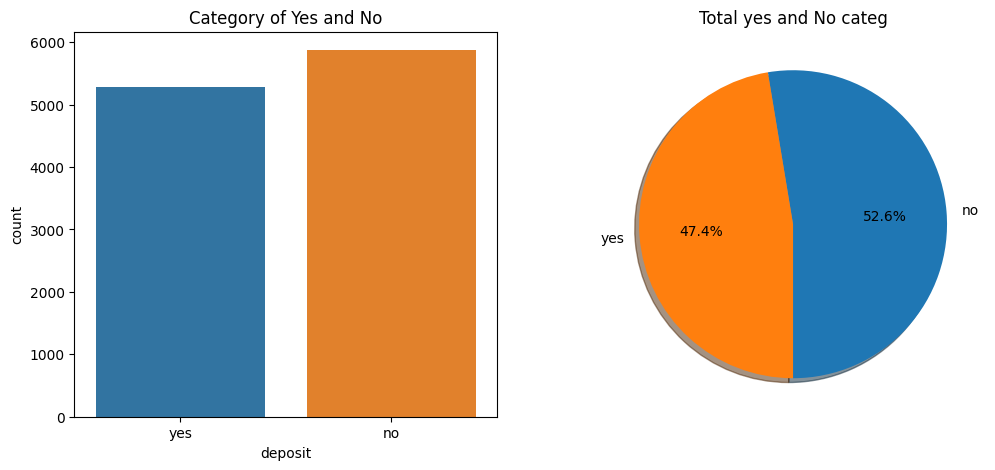

In [ ]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=df)
plt.title("Category of Yes and No")
plt.subplot(1,2,2)
labels =df['deposit'].value_counts(sort = True).index
sizes = df['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total yes and No categ',size = 12)
plt.show()

In [ ]:
#As seen Data is balance i.e 50-50 % of yes/no binary cateogry
#If not balance then its can balance by random oversampling

####Visualisation Of Categorical Features

In [ ]:
df_cat = df.select_dtypes(include='object').columns.drop(["deposit","job"])
df_cat

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [ ]:
#Count Plot

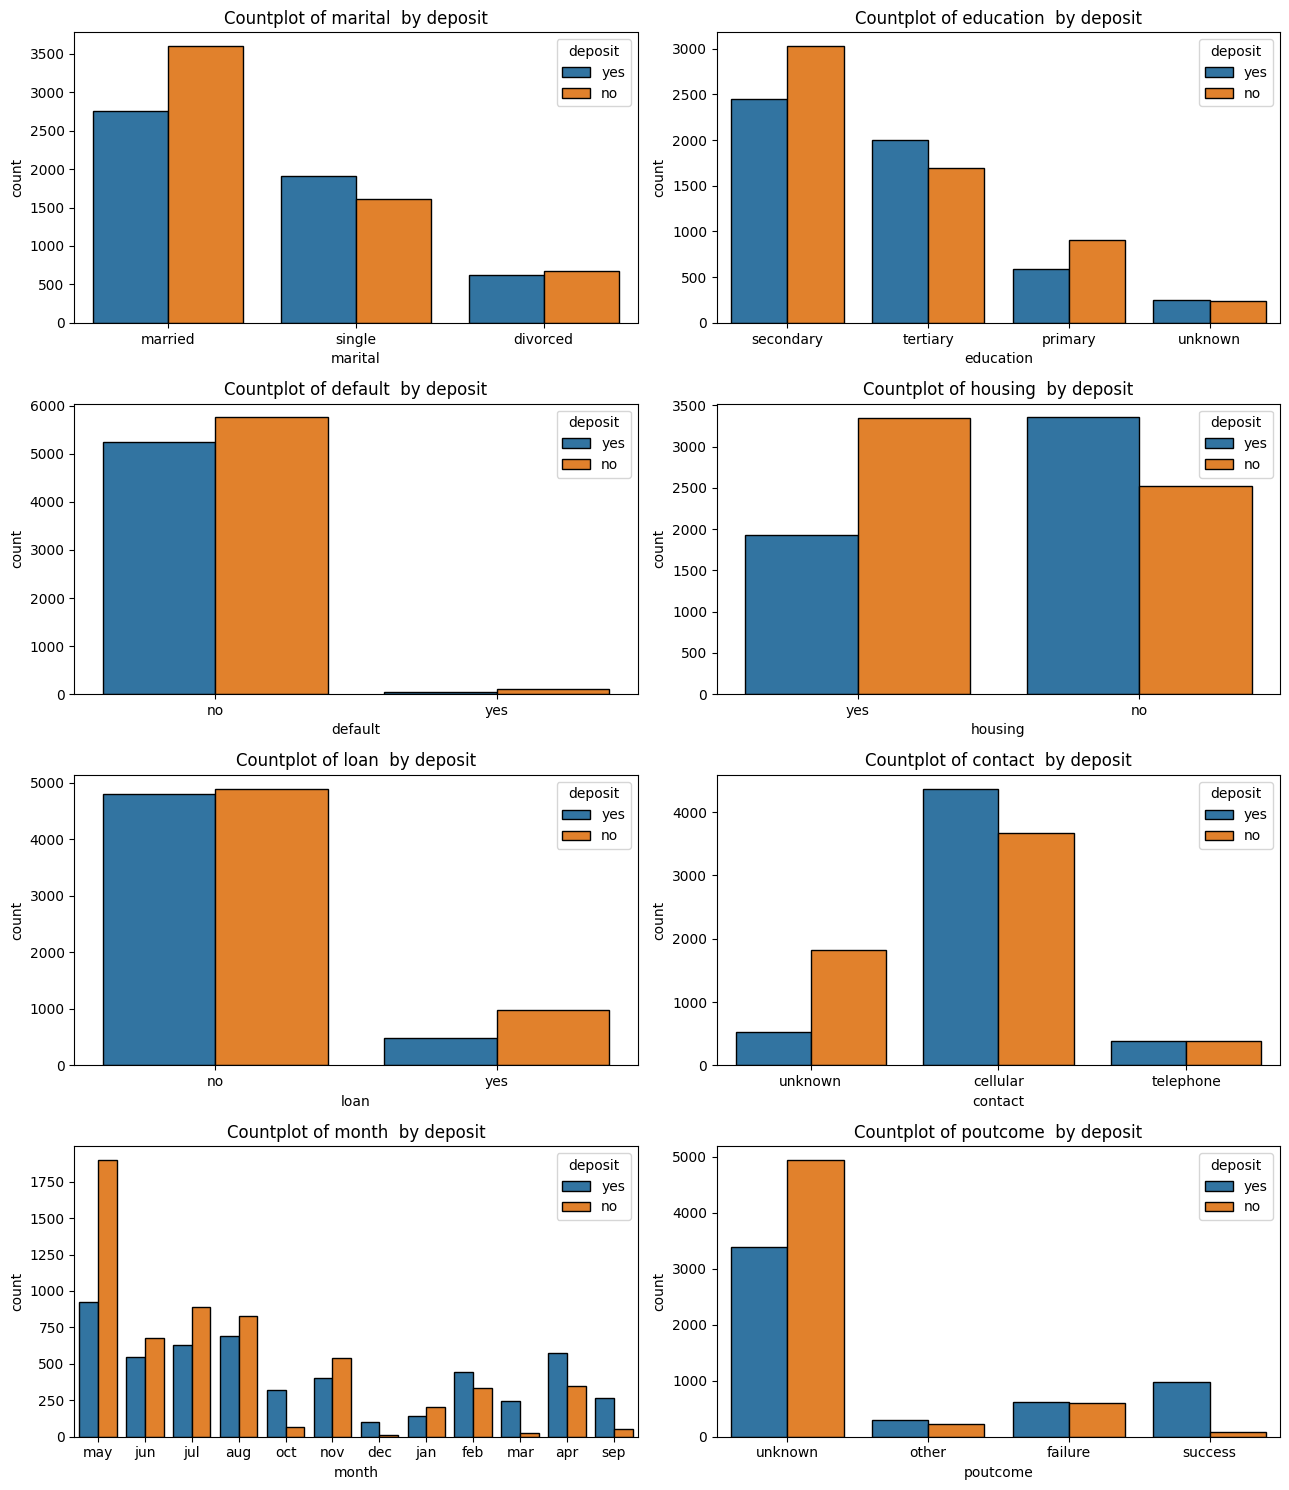

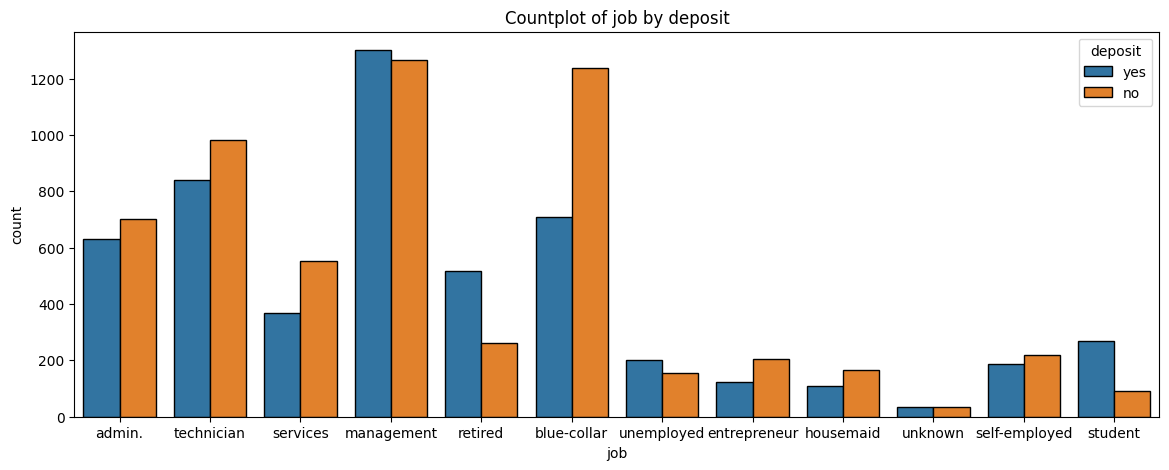

In [ ]:
plt.figure(figsize=(13,15))
for i,cat_fea in enumerate(df_cat):
    plt.subplot(4,2,i+1)
    sns.countplot(x=cat_fea,hue='deposit',data=df,edgecolor="black")
    plt.title("Countplot of {}  by deposit".format(cat_fea))
plt.tight_layout()
plt.show()
plt.figure(figsize=[14,5])
sns.countplot(x='job', hue='deposit',edgecolor="black",data=df)
plt.title("Countplot of job by deposit")
plt.show()


In [ ]:
#people with no housing loan are more likely to subscribe for the term deposit
#cellular contact is more chances that a person will subscribe the termm deposit
#student and retired people are more likely to subscribe the term deposit

####Visualisation of Num Features

In [ ]:
#Scatter Plot

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous
7 deposit


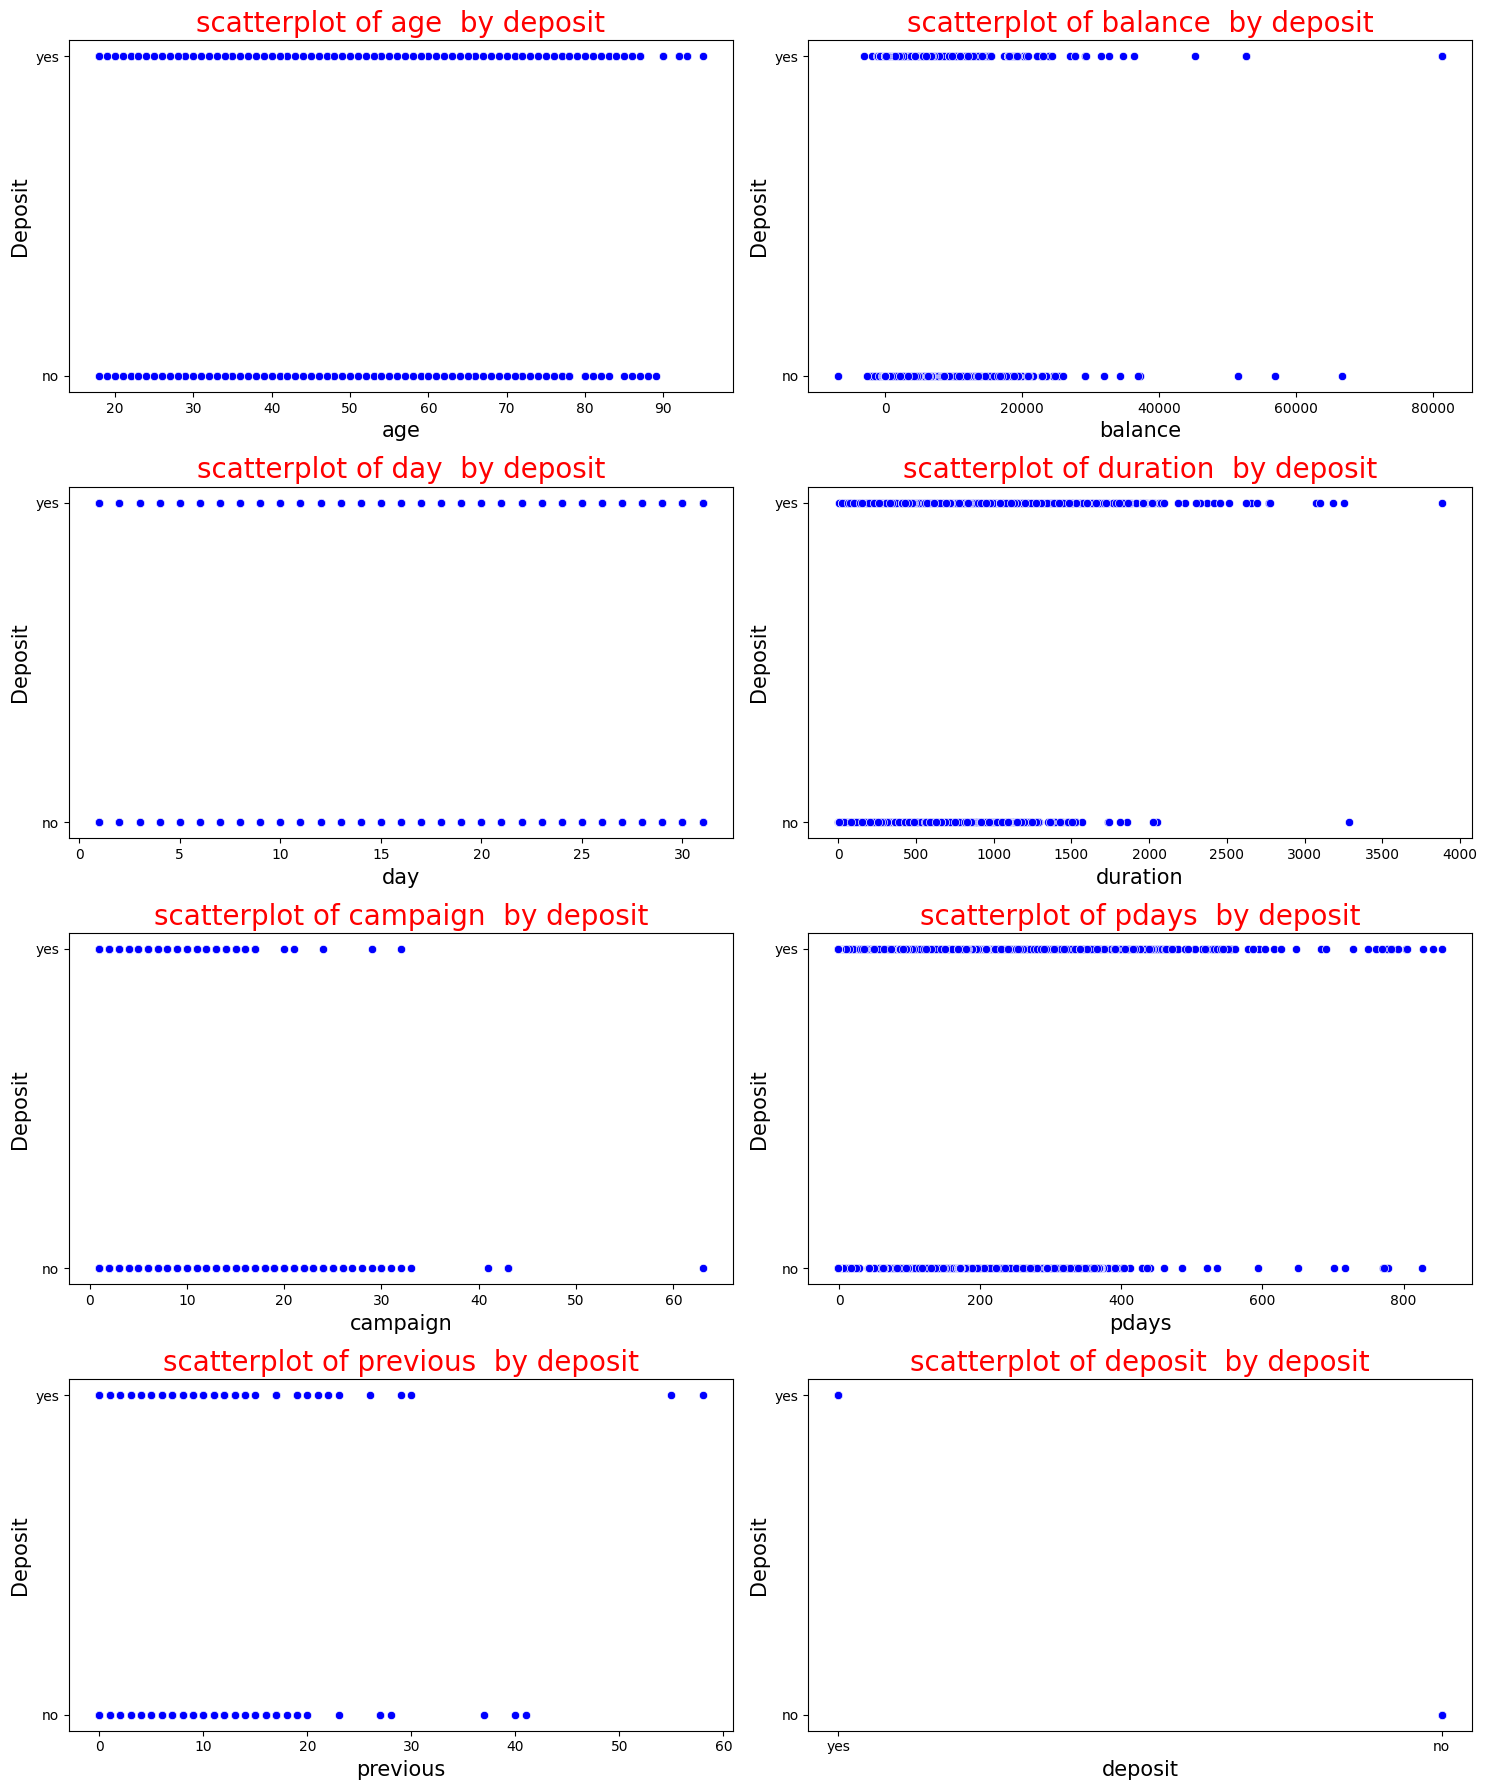

In [ ]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','deposit']]
col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','deposit']
plt.figure(figsize=(15,18))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=v,y='deposit' ,data=df_num,color='blue')
    plt.title("scatterplot of {}  by deposit".format(v),size=20,color="red")
    plt.xlabel("{}".format(v),size=15)
    plt.ylabel("Deposit",size=15)
plt.tight_layout()
plt.show()

In [ ]:
#Box Plot

In [ ]:
#If our dataset is small, we can detect the outlier by just looking at the dataset. But what if we have a huge dataset,
#how do we identify the outliers then? We need to use visualization and mathematical techniques.

#Below are some of the techniques of detecting outliers

#Boxplots

#Z-score

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous


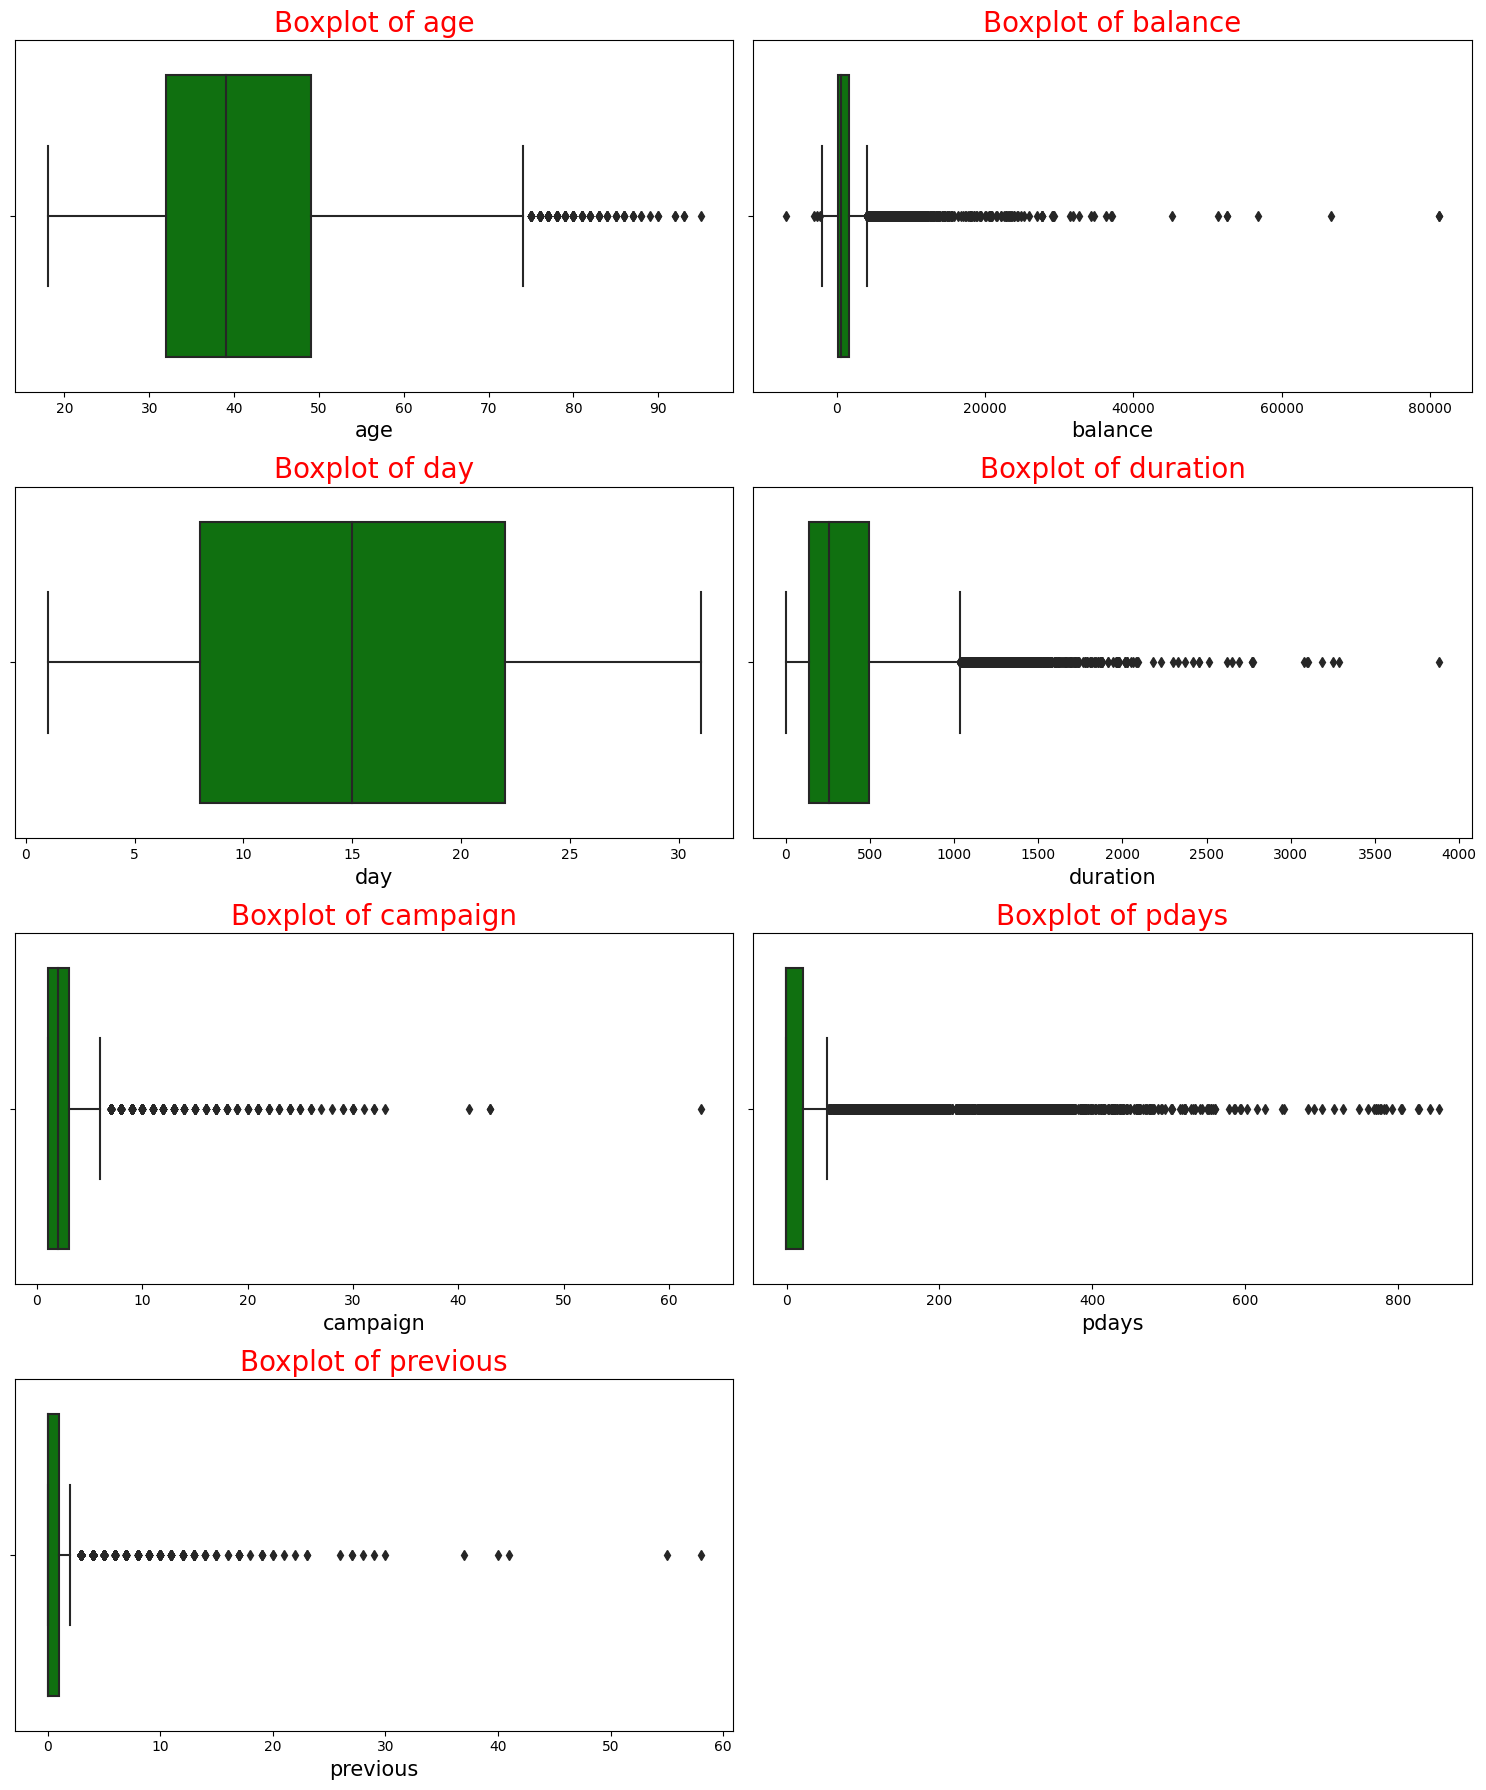

In [ ]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(15,18))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.boxplot(x=v,data=df_num,color='green')
    plt.title("Boxplot of {}".format(v),size=20,color="red")
    plt.xlabel("{}".format(v),size=15)
plt.tight_layout()
plt.show()

#####Conclusion

In [ ]:
#Duration is matter most clearly seen from above plot higher the duration more the chances that person will subscrised for deposit
#lower Campaign higher the chances that person will subscrised for deposit
#pdays should be more
#People those susbcribed for deposit has higher balance

####Handling Outliers

In [ ]:
len(df[df['balance']<0])/len(df)

0.061637699337036375

In [ ]:
df[(df['balance']>40000)|(df['balance']<0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
17,49,services,married,secondary,no,-8,yes,no,unknown,8,may,1119,1,-1,0,unknown,yes
23,43,blue-collar,married,primary,no,-192,yes,no,unknown,8,may,1120,2,-1,0,unknown,yes
30,32,blue-collar,married,secondary,yes,-1,yes,no,unknown,9,may,653,1,-1,0,unknown,yes
42,45,entrepreneur,divorced,tertiary,no,-395,yes,no,unknown,13,may,470,1,-1,0,unknown,yes
59,57,technician,married,tertiary,no,-1,no,no,unknown,14,may,850,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,39,management,married,tertiary,no,-974,no,yes,cellular,13,aug,130,4,-1,0,unknown,no
11120,50,management,married,tertiary,no,-516,yes,no,unknown,15,may,226,2,-1,0,unknown,no
11132,32,blue-collar,married,secondary,no,-325,yes,yes,unknown,21,may,171,1,-1,0,unknown,no
11145,60,retired,divorced,tertiary,no,-134,no,no,cellular,12,may,243,1,271,4,failure,no


#####Dropping negative values of balance

In [ ]:
#As we know bank balance can't be negative
#there are some records with negative balance and very high balance
#which act as major outliers
#so we drop them

In [ ]:
df.drop(df[(df['balance']>40000)|(df['balance']<0)].index,inplace=True,axis=0)

In [ ]:
#Duration

In [ ]:
df[df['duration']>3000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
153,44,services,divorced,secondary,no,51,yes,yes,unknown,27,may,3094,2,-1,0,unknown,yes
271,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes
1351,47,blue-collar,married,secondary,no,238,yes,yes,cellular,13,mar,3076,1,-1,0,unknown,yes
4364,53,admin.,married,secondary,no,849,yes,no,cellular,6,feb,3102,3,-1,0,unknown,yes
7198,30,admin.,married,secondary,no,1310,no,no,telephone,27,oct,3284,1,-1,0,unknown,no


In [ ]:
df.drop(df[df['duration']>3000].index,inplace=True,axis=0)

In [ ]:
#Campaign

In [ ]:
df[df['campaign']>40]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
6927,51,blue-collar,married,unknown,no,41,yes,no,telephone,9,jul,16,43,-1,0,unknown,no
7139,42,blue-collar,married,primary,no,170,yes,no,unknown,19,may,51,41,-1,0,unknown,no
7240,33,blue-collar,married,secondary,no,0,yes,yes,cellular,31,jul,16,43,-1,0,unknown,no
7635,45,management,married,unknown,no,9051,yes,no,unknown,19,may,124,63,-1,0,unknown,no


In [ ]:
df.drop(df[df['campaign']>30].index,axis=0,inplace=True)

In [ ]:
#pdays

In [ ]:
df[df['pdays']==-1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no


In [ ]:
df[df['poutcome']=='unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no


In [ ]:
df[df['previous']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no


In [ ]:
#Conclusion
#As seen above pdays -1 means these peoples are new or involving 1st time in campaign and
#they have no previous contact so previous ==0 and
# poutcomes is unknown for all -1 values of pdays
#we will drop pdays columns

In [ ]:
df.drop("pdays",inplace=True,axis=1)

In [ ]:
#previous

In [ ]:
df[df['previous']>30]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
2013,46,blue-collar,married,primary,no,1085,yes,yes,cellular,15,may,523,2,58,other,yes
3677,37,technician,married,secondary,no,432,yes,no,cellular,6,jul,386,3,55,failure,yes
6274,27,blue-collar,married,secondary,no,821,yes,yes,unknown,16,sep,23,1,41,other,no
8713,35,technician,single,secondary,no,4645,yes,no,cellular,11,jan,502,3,40,other,no
10121,27,student,single,secondary,no,91,no,no,telephone,4,dec,157,6,37,other,no


In [ ]:
df.drop(df[df['previous']>30].index,axis=0,inplace=True)

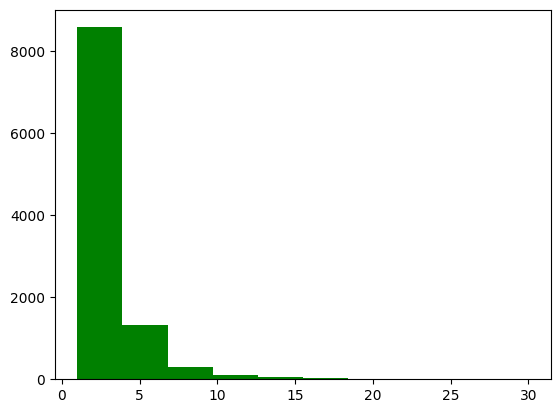

In [ ]:
#df1 = df[df['balance']>0]
plt.hist(x="campaign",data=df,color='green')
plt.show()

In [ ]:
df1=df.copy()

In [ ]:
#Conclusion

In [ ]:
#Duration is matter most clearly seen from above plot higher the duration more the chances that person will subscrised for deposit
#Campaign should be low as possible
#pdays should be more
#People those susbcribed for deposit has higher balance

####Correlation heatmap

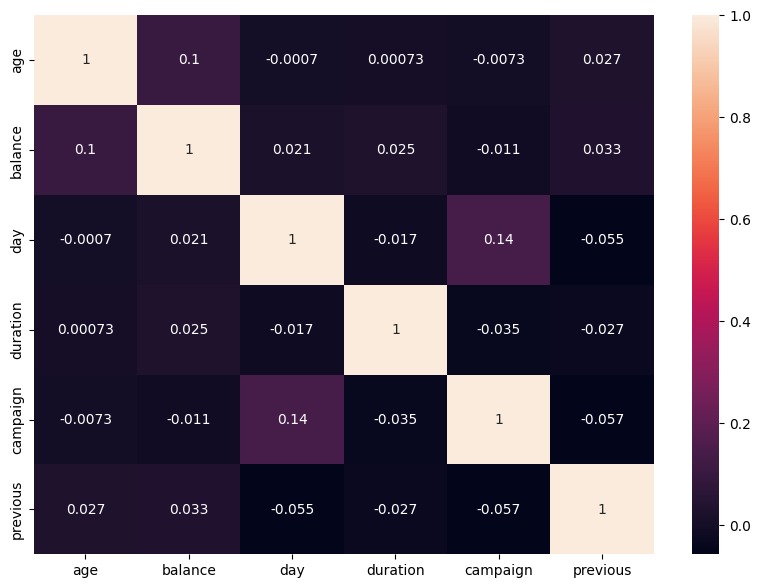

In [ ]:
#Pearson’s Correlations, which measures the strength of a linear relationship
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'previous']]
plt.figure(figsize=(10,7))
sns.heatmap(data=df_num.corr(), annot=True)
plt.show()

In [ ]:
#There is No Multi-colinearity problem as No relation with input columns

####Encoding for Categ Features

In [ ]:
#create dict for binary encoding
dic = {"yes":1,"no":0}

In [ ]:
from sklearn.preprocessing import LabelEncoder
dic = {"yes":1,"no":0}
lst = ["deposit","loan","default","housing"]
for i in lst:
    df[i] = df[i].map(dic)

In [ ]:
# Ordinal Encoding
l=['month',"contact","poutcome"]
for i in l:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i].values)


In [ ]:
# OneHot Encoding
df = pd.get_dummies(df, columns = ['job','marital','education'])

In [ ]:
df

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,59,0,2343,1,0,2,5,8,1042,1,...,0,0,0,0,1,0,0,1,0,0
1,56,0,45,0,0,2,5,8,1467,1,...,0,0,0,0,1,0,0,1,0,0
2,41,0,1270,1,0,2,5,8,1389,1,...,1,0,0,0,1,0,0,1,0,0
3,55,0,2476,1,0,2,5,8,579,1,...,0,0,0,0,1,0,0,1,0,0
4,54,0,184,0,0,2,5,8,673,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,0,20,0,257,1,...,0,0,0,0,0,1,1,0,0,0
11158,39,0,733,0,0,2,16,6,83,4,...,0,0,0,0,1,0,0,1,0,0
11159,32,0,29,0,0,0,19,1,156,2,...,1,0,0,0,0,1,0,1,0,0
11160,43,0,0,0,1,0,8,8,9,2,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
#resetting the Index

In [ ]:
df=df.reset_index()

In [ ]:
df.drop('index',axis=1,inplace=True)

###Data Preprocessing

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#X - Independent Varables (Inputs features)
#Y - Dependent Varables (target or output variable)

In [ ]:
X = df.drop('deposit',axis=1)
Y = df['deposit']

In [ ]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
10444    0
10445    0
10446    0
10447    0
10448    0
Name: deposit, Length: 10449, dtype: int64

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=1)
for train_index,test_index in sss.split(X,Y):
    train_df = df.loc[train_index]
    test_df = df.loc[test_index]

In [ ]:
print("Ratio for train dataset")
print(train_df['deposit'].value_counts()/train_df.shape[0])
print()
print("ratio for test dataset")
print(test_df['deposit'].value_counts()/test_df.shape[0])

Ratio for train dataset
0    0.51504
1    0.48496
Name: deposit, dtype: float64

ratio for test dataset
0    0.515152
1    0.484848
Name: deposit, dtype: float64


In [ ]:
df=df.reset_index()

In [ ]:
df.drop('index',axis=1,inplace=True)

In [ ]:
df

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,59,0,2343,1,0,2,5,8,1042,1,...,0,0,0,0,1,0,0,1,0,0
1,56,0,45,0,0,2,5,8,1467,1,...,0,0,0,0,1,0,0,1,0,0
2,41,0,1270,1,0,2,5,8,1389,1,...,1,0,0,0,1,0,0,1,0,0
3,55,0,2476,1,0,2,5,8,579,1,...,0,0,0,0,1,0,0,1,0,0
4,54,0,184,0,0,2,5,8,673,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,33,0,1,1,0,0,20,0,257,1,...,0,0,0,0,0,1,1,0,0,0
10445,39,0,733,0,0,2,16,6,83,4,...,0,0,0,0,1,0,0,1,0,0
10446,32,0,29,0,0,0,19,1,156,2,...,1,0,0,0,0,1,0,1,0,0
10447,43,0,0,0,1,0,8,8,9,2,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
X = df.drop('deposit',axis=1)
Y = df['deposit']

In [ ]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
10444    0
10445    0
10446    0
10447    0
10448    0
Name: deposit, Length: 10449, dtype: int64

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=1)
for train_index,test_index in sss.split(X,Y):
    train_df = df.loc[train_index]
    test_df = df.loc[test_index]

####Category Ratio test for Train & test Dataset

In [ ]:
print("Ratio for train dataset")
print(train_df['deposit'].value_counts()/train_df.shape[0])
print()
print("ratio for test dataset")
print(test_df['deposit'].value_counts()/test_df.shape[0])

Ratio for train dataset
0    0.51504
1    0.48496
Name: deposit, dtype: float64

ratio for test dataset
0    0.515152
1    0.484848
Name: deposit, dtype: float64


####Train & Test Dataset

In [ ]:
X_train = train_df.drop("deposit",axis=1)
Y_train = train_df['deposit']

X_test = test_df.drop("deposit",axis=1)
Y_test = test_df['deposit']

In [ ]:
X_train

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
5461,28,0,674,1,0,1,14,8,921,4,...,0,0,0,0,1,0,1,0,0,0
4220,36,0,324,1,1,0,16,5,830,1,...,0,0,0,0,1,0,0,1,0,0
5530,56,0,1480,1,1,0,5,3,576,1,...,1,0,0,1,0,0,0,1,0,0
4249,31,0,26965,0,0,0,21,0,654,2,...,0,0,0,0,0,1,1,0,0,0
9514,30,0,177,1,0,0,9,0,62,2,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,34,0,425,1,0,0,16,5,1389,7,...,0,0,0,0,1,0,1,0,0,0
4223,27,0,11862,0,0,0,25,9,285,2,...,1,0,0,0,0,1,0,0,1,0
343,26,0,551,0,0,0,8,5,531,1,...,0,0,0,0,0,1,0,1,0,0
4449,41,0,5517,1,0,0,10,5,584,1,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
lr= LogisticRegression()

lr.fit(X_train_s,Y_train)
Y_pred_lr = lr.predict(X_test_s)

print("Testing Accuracy of LogisticRegression : ",metrics.accuracy_score(Y_test,Y_pred_lr))
#print("Accuracy of LogisticRegression",pipe_lr.score(X_test,Y_test))

print("Training Accuracy of LogisticRegression : ",lr.score(X_train_s,Y_train))

Testing Accuracy of LogisticRegression :  0.7894736842105263
Training Accuracy of LogisticRegression :  0.7950505879135904


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1615
           1       0.48      1.00      0.65      1520

    accuracy                           0.48      3135
   macro avg       0.24      0.50      0.33      3135
weighted avg       0.24      0.48      0.32      3135

[[   0 1615]
 [   0 1520]]
AUC: 0.5021671826625387


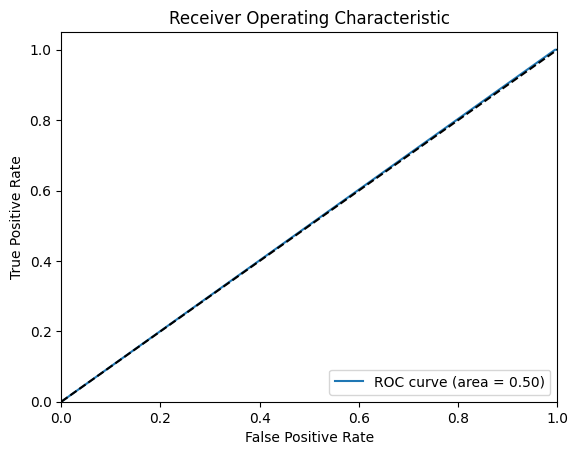

In [ ]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, auc
import matplotlib.pyplot as plt

# Get model predictions
Y_pred_lr = lr.predict(X_test)

# Print classification report
print(classification_report(Y_test, Y_pred_lr))

# Print confusion matrix
print(confusion_matrix(Y_test, Y_pred_lr))

# Calculate probabilities for the positive class
y_prob = lr.predict_proba(X_test)[:, 1]

# Get ROC curve parameters
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate AUC (Area Under Curve)
print('AUC:', auc(fpr, tpr))

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)


In [ ]:
lr_resampled = LogisticRegression()
lr_resampled.fit(X_train_resampled, Y_train_resampled)


LogisticRegression()

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1615
           1       0.76      0.71      0.73      1520

    accuracy                           0.75      3135
   macro avg       0.75      0.75      0.75      3135
weighted avg       0.75      0.75      0.75      3135

[[1268  347]
 [ 437 1083]]
AUC: 0.8313109010917386


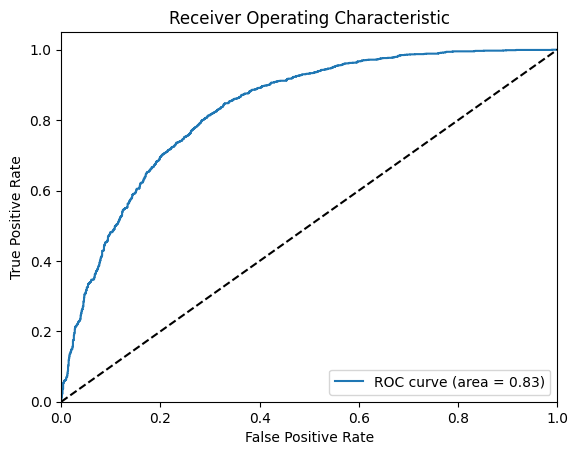

In [ ]:
Y_pred_lr_resampled = lr_resampled.predict(X_test)

print(classification_report(Y_test, Y_pred_lr_resampled))
print(confusion_matrix(Y_test, Y_pred_lr_resampled))

y_prob_resampled = lr_resampled.predict_proba(X_test)[:, 1]
fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(Y_test, y_prob_resampled)

print('AUC:', auc(fpr_resampled, tpr_resampled))

plt.figure()
plt.plot(fpr_resampled, tpr_resampled, label='ROC curve (area = %0.2f)' % auc(fpr_resampled, tpr_resampled))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
